In [66]:
!pip install apyori
!pip install mlxtend
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [40]:
df = pd.read_csv("book.csv")

In [41]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [42]:
bks = df.copy()

In [43]:
bks.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [44]:
bks.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [45]:
bks.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [46]:
bks.shape

(2000, 11)

In [47]:
item_sets = {}

In [48]:
tse = TransactionEncoder()

In [49]:
tse_ary = tse.fit(bks).transform(bks)

In [50]:
hp = pd.DataFrame(tse_ary, columns=tse.columns_)

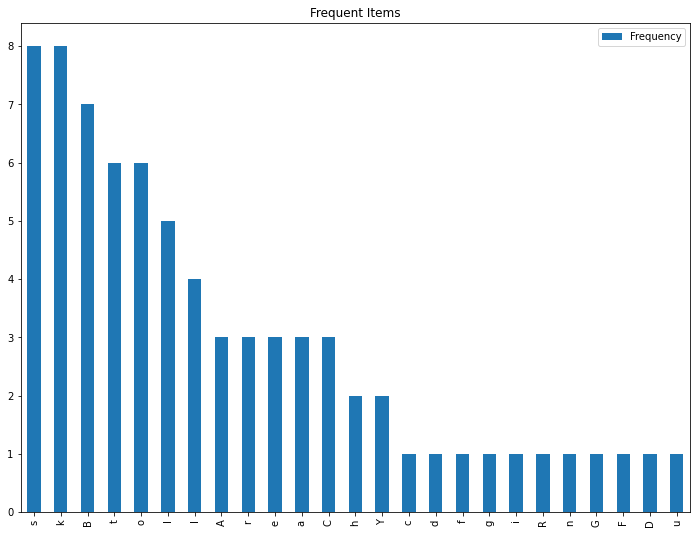

In [51]:
hp.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,9),
                                                                                  title="Frequent Items")
plt.show()

In [52]:
## apriori algorithm
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [53]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [54]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(bks,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [55]:
confs = []

In [56]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(hp,confidence=confidence,support=i)
    confs.append(ap_i)
import warnings
warnings.filterwarnings("ignore")

In [57]:
all_conf = pd.concat(confs,axis=1)

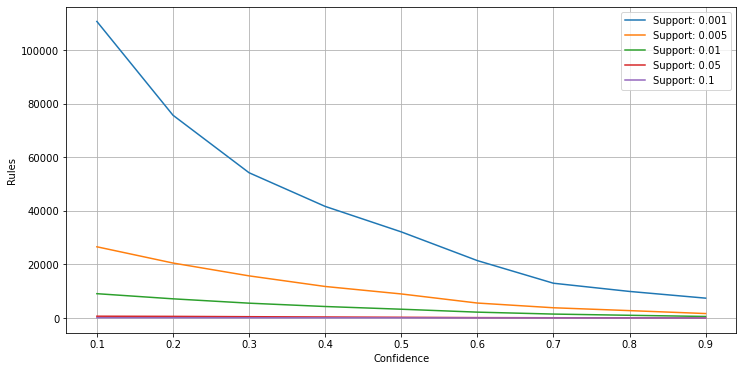

In [58]:
all_conf.plot(figsize=(12,6),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

In [59]:
print("inferences from above plot: higher confidence level lower the no. of rules & higher the support lower the no.of rules")

inferences from above plot: higher confidence level lower the no. of rules & higher the support lower the no.of rules


In [60]:
## with support 0.01 & confidence 0.4
ap_final =  apriori(hp,0.001,True)

In [61]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [62]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
741,"(k, Y)","(s, t, o, B)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
742,"(t, Y)","(s, B, o, k)",0.0010,0.0020,0.001,1.000000,500.000000,0.000998,inf
743,"(B, Y)","(s, t, o, k)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
746,"(t, B)","(s, Y, o, k)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970


In [63]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

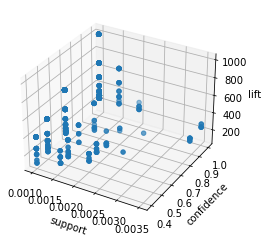

In [64]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

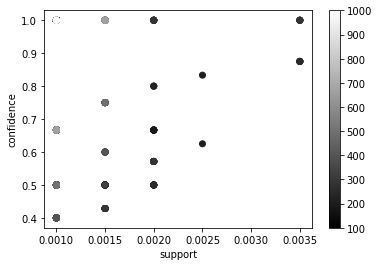

In [65]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")